In [1]:
import os
import random

In [2]:
RAW_DATA_DIR = '../data/raw/'
INSTANCES_DIR = '../data/instances/'
INFERENCE_DIR = '../data/inference/'
STATES = ['normal', 
          'backlash1', 'backlash2',
          'lackLubrication1', 'lackLubrication2',
          'spalling1', 'spalling2', 'spalling3', 'spalling4',
          'spalling5', 'spalling6', 'spalling7', 'spalling8']
LOADS= ['20kg', '40kg', '-40kg']
SMOOTHING_PE_WINDOW_SIZE = 20
SMOOTHING_CUR_WINDOW_SIZE = 15

In [3]:
random.seed(42)

load_state_dict = {load: [random.sample(
                            os.listdir(os.path.join(INSTANCES_DIR, load, state)), 1) 
                          for state in STATES] for load in LOADS}
load_state_dict

{'20kg': [['normal_20_2_3.csv'],
  ['backlash1_20_10_4.csv'],
  ['backlash2_20_3_5.csv'],
  ['lackLubrication1_20_4_1.csv'],
  ['lackLubrication2_20_3_4.csv'],
  ['spalling1_20_2_1.csv'],
  ['spalling2_20_2_1.csv'],
  ['spalling3_20_8_3.csv'],
  ['spalling4_20_1_2.csv'],
  ['spalling5_20_9_3.csv'],
  ['spalling6_20_6_5.csv'],
  ['spalling7_20_10_3.csv'],
  ['spalling8_20_10_2.csv']],
 '40kg': [['normal_40_2_2.csv'],
  ['backlash1_40_4_1.csv'],
  ['backlash2_40_3_2.csv'],
  ['lackLubrication1_40_7_4.csv'],
  ['lackLubrication2_40_9_4.csv'],
  ['spalling1_40_10_3.csv'],
  ['spalling2_40_8_4.csv'],
  ['spalling3_40_3_1.csv'],
  ['spalling4_40_8_4.csv'],
  ['spalling5_40_6_2.csv'],
  ['spalling6_40_3_5.csv'],
  ['spalling7_40_7_1.csv'],
  ['spalling8_40_9_1.csv']],
 '-40kg': [['normal_-40_3_5.csv'],
  ['backlash1_-40_10_1.csv'],
  ['backlash2_-40_2_5.csv'],
  ['lackLubrication1_-40_7_2.csv'],
  ['lackLubrication2_-40_5_2.csv'],
  ['spalling1_-40_4_4.csv'],
  ['spalling2_-40_2_4.csv'],
  ['

In [5]:
import sys
sys.path.append('../')
from rocket_rag.utils import fit

In [10]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [16]:
def extract_data_for_plotting(load: str):
    filenames = [os.path.join(INSTANCES_DIR, load, state, filename) 
                    for state in STATES 
                    for filename in load_state_dict[load][STATES.index(state)]]

    pos_arr, cur_arr = [], []
    for filename in filenames:
        pos_arr.append(fit(ts_filename=filename, 
                           field='position_error',
                           smooth=True,
                           smooth_ws=SMOOTHING_PE_WINDOW_SIZE,
                           tolist=True)
                       )
        cur_arr.append(fit(ts_filename=filename, 
                           field='current', 
                           smooth=True,
                           smooth_ws=SMOOTHING_CUR_WINDOW_SIZE,
                           tolist=True)
                       )
    
    return pos_arr, cur_arr

In [17]:
def plot_figures(position_errors, currents, load):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 18))

    [ax1.plot(position_errors[i], label=f'{STATES[i]}') for i in range(len(STATES))]
    ax1.set_xlabel('Time')
    ax1.set_xlim(0, len(position_errors[0]))
    ax1.set_xticks([i for i in range(0, len(position_errors[0])) if i % 10 == 0])
    ax1.set_ylabel('Position Error')
    ax1.set_title(f"Position Errors for Different States ({load})")
    ax1.legend()

    [ax2.plot(currents[i], label=f'{STATES[i]}') for i in range(len(STATES))]
    ax2.set_xlabel('Time')
    ax2.set_xlim(0, len(currents[0]))
    ax2.set_xticks([i for i in range(0, len(currents[0])) if i % 10 == 0])
    ax2.set_ylabel('Current')
    ax2.set_title(f"Currents for Different States ({load})")
    ax2.legend()

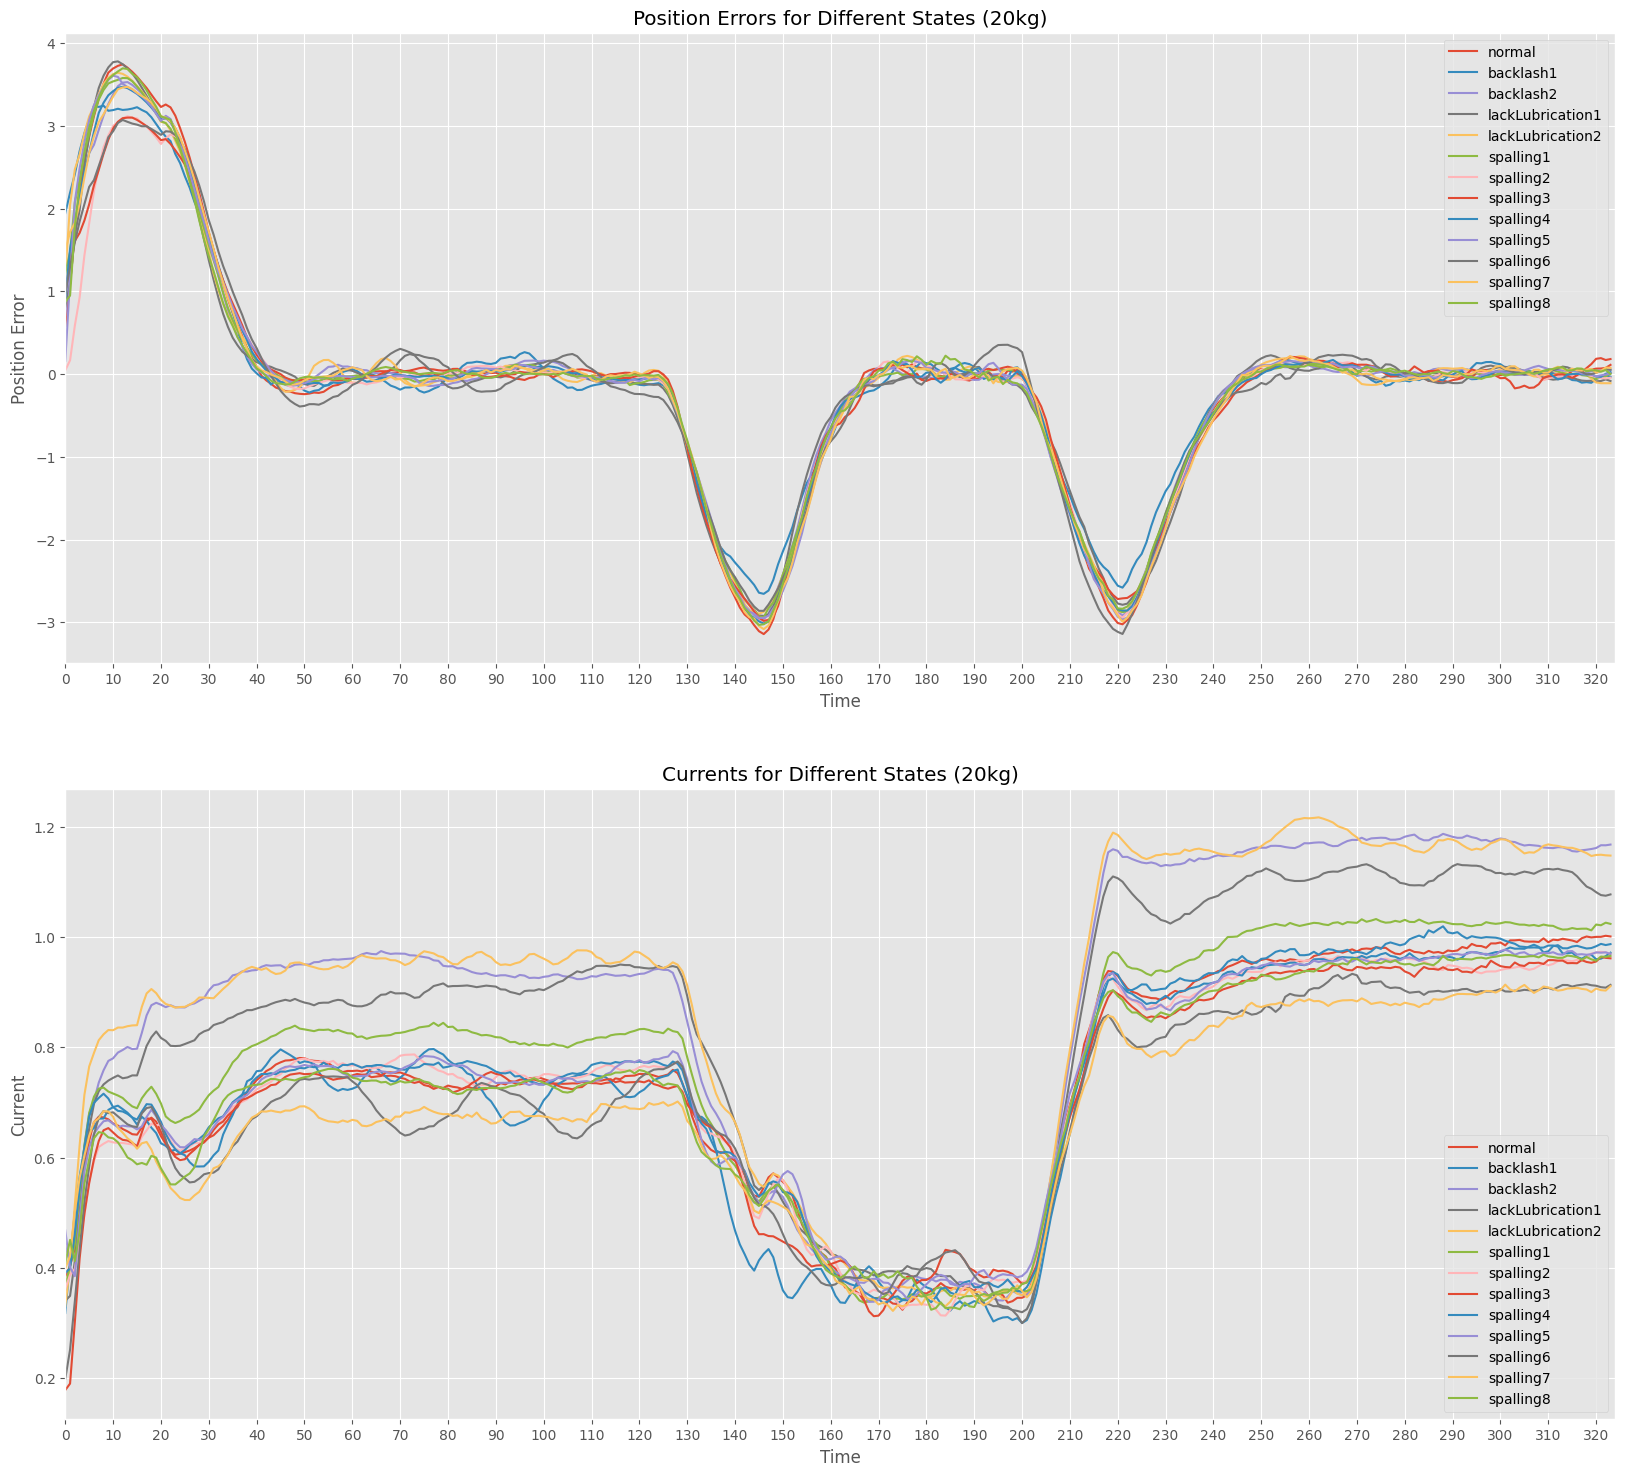

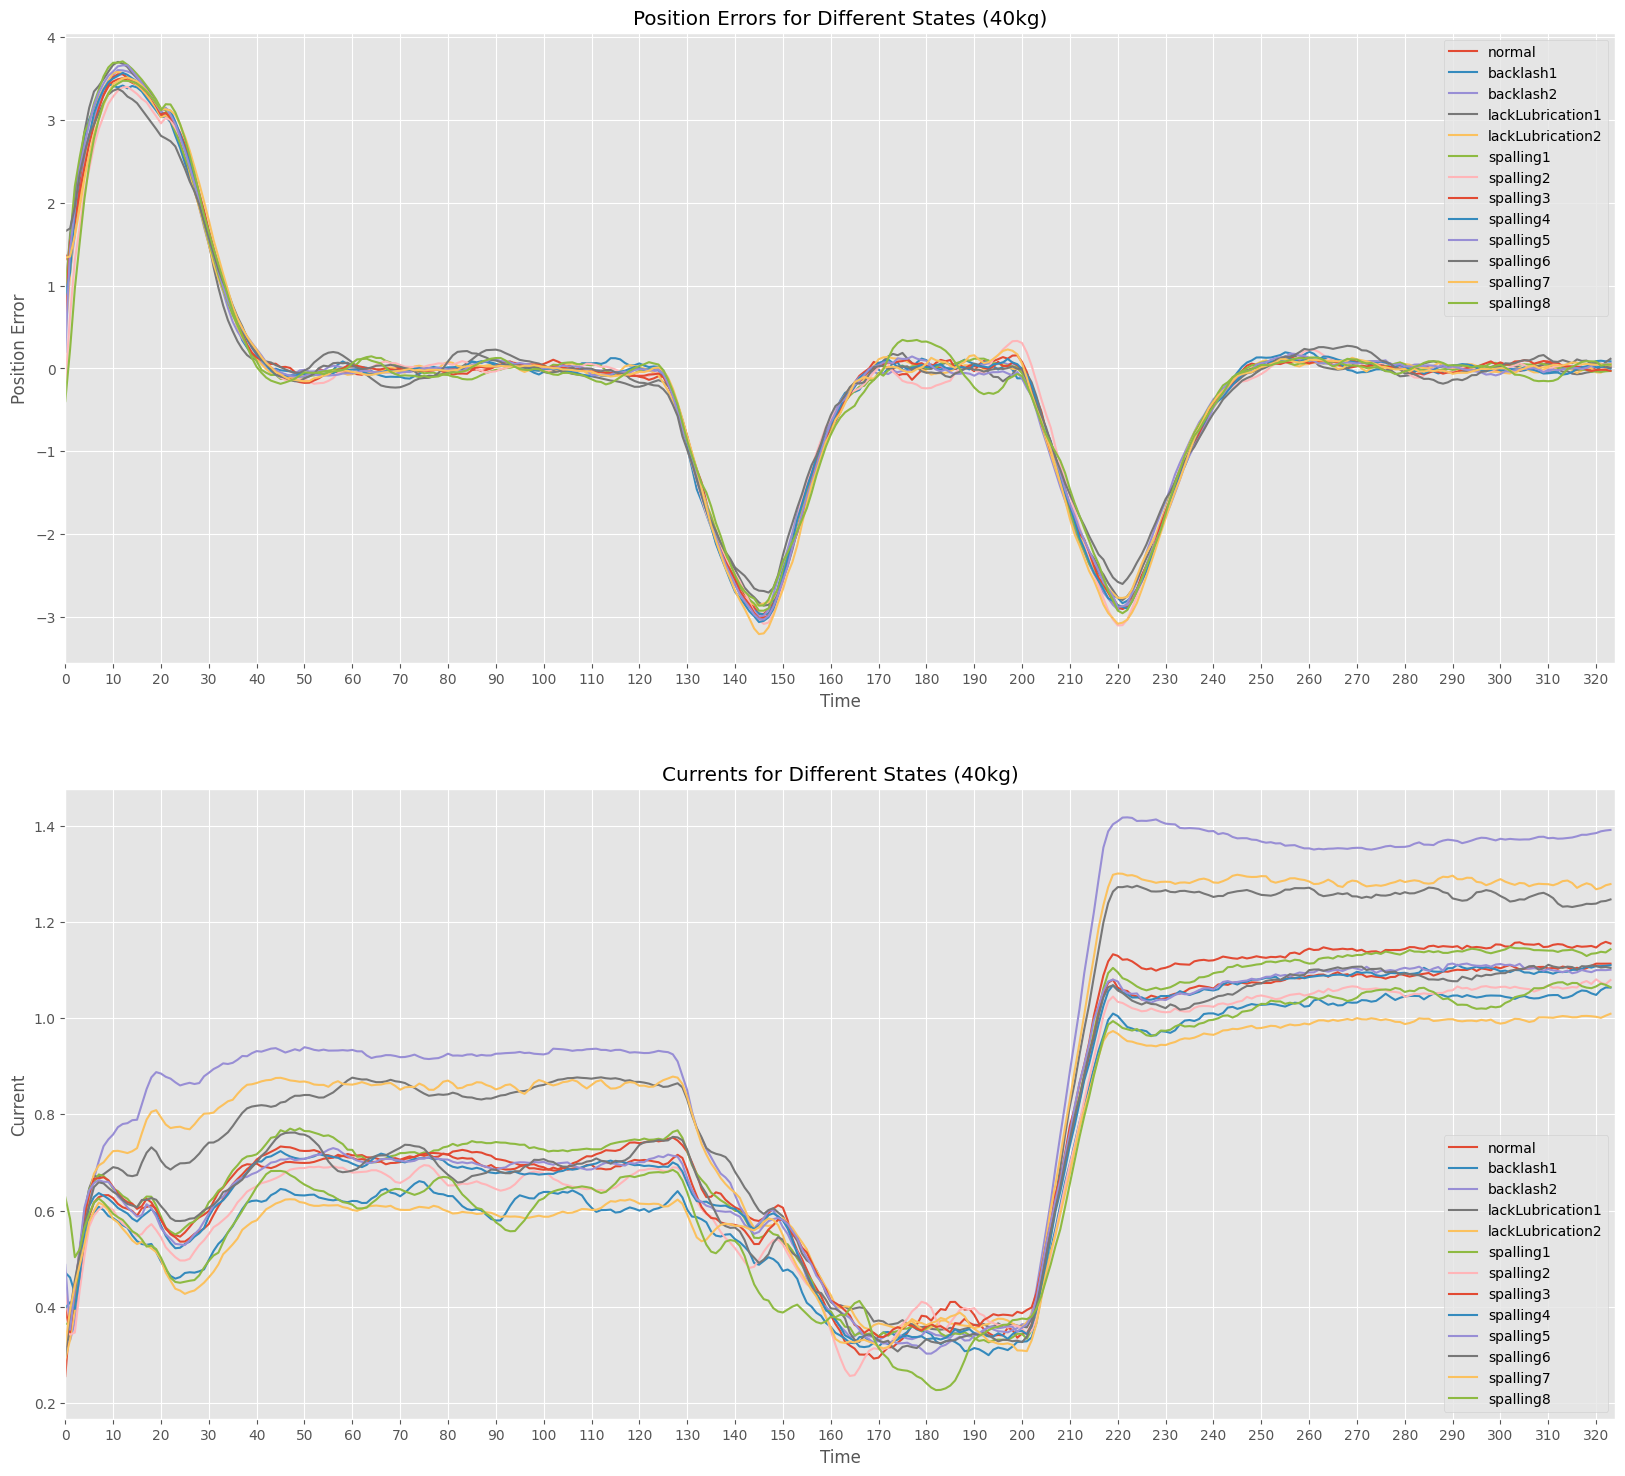

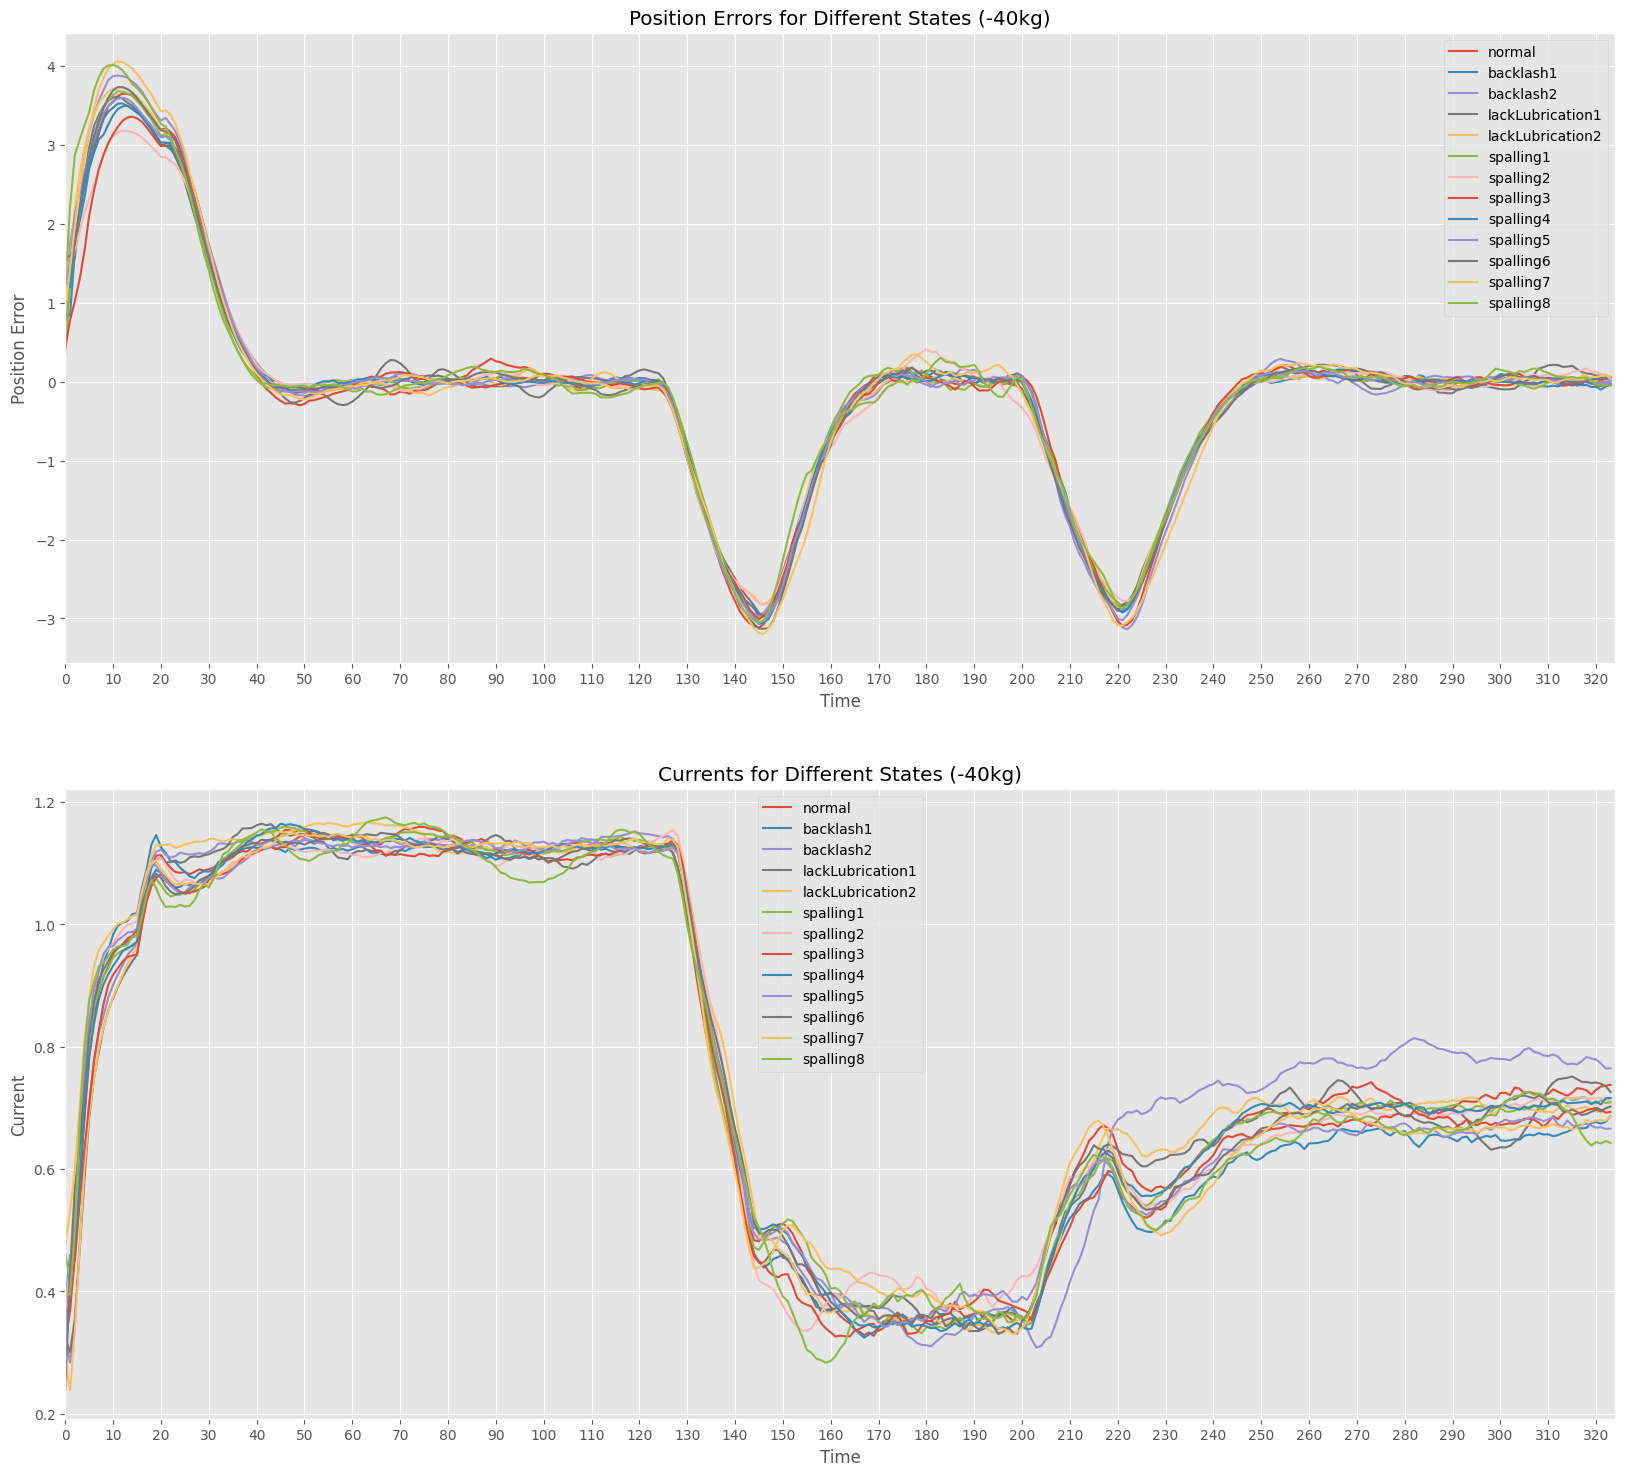

In [18]:
for load in LOADS:
    pos_arr, cur_arr = extract_data_for_plotting(load)
    plot_figures(pos_arr, cur_arr, load=load)